In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.utils.data as data
import torch

In [ ]:
train_data=pd.read_csv('/content/train.csv')
train_data[['Cabin_Letter1', 'Cabin_Number', 'Cabin_Letter2']] = train_data['Cabin'].str.split('/', expand=True)
train_data=train_data.drop(['Cabin'],axis=1)
labels=train_data['Transported']
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Letter1,Cabin_Number,Cabin_Letter2
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8492 non-null   object 
 2   CryoSleep      8476 non-null   object 
 3   Destination    8511 non-null   object 
 4   Age            8514 non-null   float64
 5   VIP            8490 non-null   object 
 6   RoomService    8512 non-null   float64
 7   FoodCourt      8510 non-null   float64
 8   ShoppingMall   8485 non-null   float64
 9   Spa            8510 non-null   float64
 10  VRDeck         8505 non-null   float64
 11  Name           8493 non-null   object 
 12  Transported    8693 non-null   bool   
 13  Cabin_Letter1  8494 non-null   object 
 14  Cabin_Number   8494 non-null   object 
 15  Cabin_Letter2  8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


<Axes: >

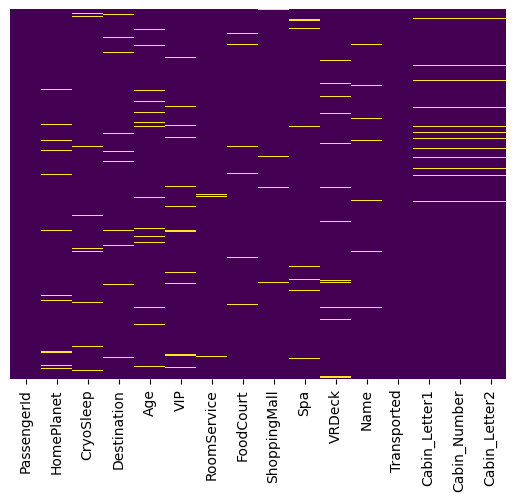

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
missing_values = train_data.isnull().sum()
print(missing_values)

PassengerId        0
HomePlanet       201
CryoSleep        217
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
Cabin_Letter1    199
Cabin_Number     199
Cabin_Letter2    199
dtype: int64


In [ ]:
test_data=pd.read_csv('/content/test.csv')
test_data[['Cabin_Letter1', 'Cabin_Number', 'Cabin_Letter2']] = test_data['Cabin'].str.split('/', expand=True)
test_data=test_data.drop(['Cabin'],axis=1)
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_Letter1,Cabin_Number,Cabin_Letter2
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   object 
 1   HomePlanet     4190 non-null   object 
 2   CryoSleep      4184 non-null   object 
 3   Destination    4185 non-null   object 
 4   Age            4186 non-null   float64
 5   VIP            4184 non-null   object 
 6   RoomService    4195 non-null   float64
 7   FoodCourt      4171 non-null   float64
 8   ShoppingMall   4179 non-null   float64
 9   Spa            4176 non-null   float64
 10  VRDeck         4197 non-null   float64
 11  Name           4183 non-null   object 
 12  Cabin_Letter1  4177 non-null   object 
 13  Cabin_Number   4177 non-null   object 
 14  Cabin_Letter2  4177 non-null   object 
dtypes: float64(6), object(9)
memory usage: 501.3+ KB


Train_data中需要填充Unkown的变量

<Axes: >

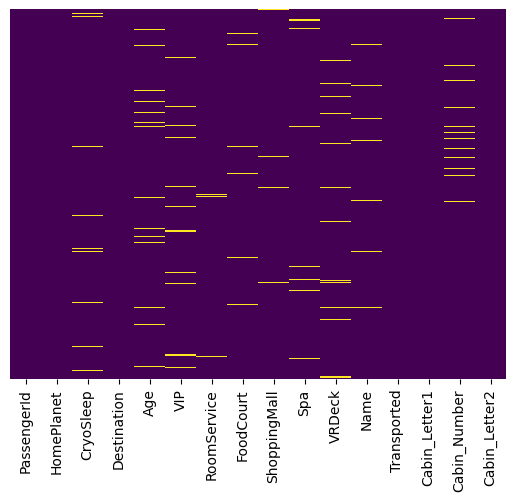

In [ ]:
Unknown_nan=['HomePlanet','Destination','Cabin_Letter1','Cabin_Letter2']
for each in Unknown_nan:
    train_data[each].fillna('Unknown', inplace=True)
    test_data[each].fillna('Unknown', inplace=True)
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Train-data删除CryoSleep为空的量

<Axes: >

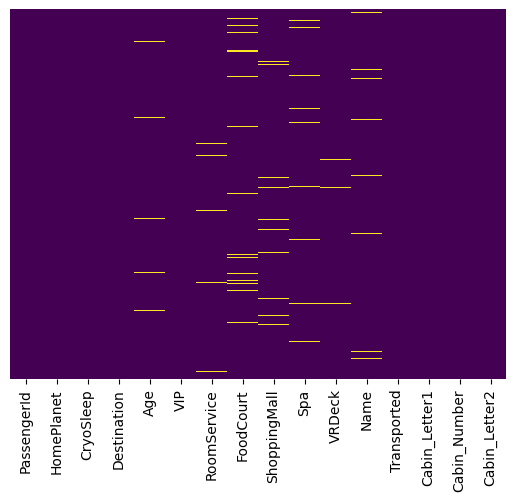

In [ ]:
train_data.dropna(subset=['CryoSleep'], inplace=True)
train_data.dropna(subset=['VIP'], inplace=True)
train_data.dropna(subset=['Cabin_Number'], inplace=True)
'''
test_data.dropna(subset=['CryoSleep'], inplace=True)
test_data.dropna(subset=['VIP'], inplace=True)
test_data.dropna(subset=['Cabin_Number'], inplace=True)
'''
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

数字全部用平均值填充

<Axes: >

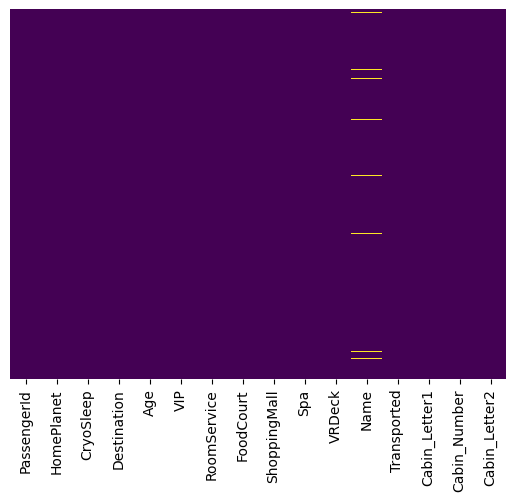

In [ ]:
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age']

for col in columns_to_fill:
    mean_value = train_data[col].mean()
    train_data[col].fillna(mean_value, inplace=True)
    mean_value1 = test_data[col].mean()
    test_data[col].fillna(mean_value1, inplace=True)

test_data['Cabin_Number'].fillna(0, inplace=True)
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

哑变量处理

In [ ]:
dummy_fields=['HomePlanet', 'Destination', 'Cabin_Letter1','Cabin_Letter2']
for each in dummy_fields:
    dummies= pd.get_dummies(train_data[each], prefix= each, drop_first=False)
    train_data = pd.concat([train_data, dummies], axis=1)
    dummies1= pd.get_dummies(test_data[each], prefix= each, drop_first=False)
    test_data = pd.concat([test_data, dummies1], axis=1)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Cabin_Letter1_A,Cabin_Letter1_B,Cabin_Letter1_C,Cabin_Letter1_D,Cabin_Letter1_E,Cabin_Letter1_F,Cabin_Letter1_G,Cabin_Letter1_T,Cabin_Letter2_P,Cabin_Letter2_S
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0,0,0,0,0,1,0,0,0,1


适当删除无关变量

In [ ]:
fields_to_drop=['PassengerId','HomePlanet','Name','Transported','Destination', 'Cabin_Letter1','Cabin_Letter2']
train_data=train_data.drop(fields_to_drop,axis=1)
fields_to_drop1=['HomePlanet','Name','Destination', 'Cabin_Letter1','Cabin_Letter2']
test_data=test_data.drop(fields_to_drop1,axis=1)
train_data.insert(0,'Transported', labels)

In [ ]:
train_data['CryoSleep']=train_data['CryoSleep'].astype(bool)
train_data['VIP']=train_data['VIP'].astype(bool)
train_data['Cabin_Number']=train_data['Cabin_Number'].astype(int)
test_data['CryoSleep']=test_data['CryoSleep'].astype(bool)
test_data['VIP']=test_data['VIP'].astype(bool)
test_data['Cabin_Number']=test_data['Cabin_Number'].astype(int)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   CryoSleep                  4277 non-null   bool   
 2   Age                        4277 non-null   float64
 3   VIP                        4277 non-null   bool   
 4   RoomService                4277 non-null   float64
 5   FoodCourt                  4277 non-null   float64
 6   ShoppingMall               4277 non-null   float64
 7   Spa                        4277 non-null   float64
 8   VRDeck                     4277 non-null   float64
 9   Cabin_Number               4277 non-null   int64  
 10  HomePlanet_Earth           4277 non-null   uint8  
 11  HomePlanet_Europa          4277 non-null   uint8  
 12  HomePlanet_Mars            4277 non-null   uint8  
 13  HomePlanet_Unknown         4277 non-null   uint8

In [ ]:
to_normalize = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for each in to_normalize:
    mean, std= train_data[each].mean(), train_data[each].std()
    train_data.loc[:, each]=(train_data[each]-mean)/std
    mean1, std1= test_data[each].mean(), test_data[each].std()
    test_data.loc[:, each]=(test_data[each]-mean1)/std1

test_data.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number,...,Cabin_Letter1_C,Cabin_Letter1_D,Cabin_Letter1_E,Cabin_Letter1_F,Cabin_Letter1_G,Cabin_Letter1_T,Cabin_Letter1_Unknown,Cabin_Letter2_P,Cabin_Letter2_S,Cabin_Letter2_Unknown
0,0013_01,True,-0.118208,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,3,...,0,0,0,0,1,0,0,0,1,0
1,0018_01,False,-0.688521,False,-0.364737,-0.285352,-0.319822,2.282741,-0.251531,4,...,0,0,0,1,0,0,0,0,1,0
2,0019_01,True,0.166949,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,0,...,1,0,0,0,0,0,0,0,1,0
3,0021_01,False,0.665973,False,-0.364737,4.118042,-0.319822,-0.110563,0.222048,1,...,1,0,0,0,0,0,0,0,1,0
4,0023_01,False,-0.617232,False,-0.348102,-0.291318,0.825649,-0.274526,-0.251531,5,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
train_data#最终训练数据

,Transported,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number,...,Cabin_Letter1_A,Cabin_Letter1_B,Cabin_Letter1_C,Cabin_Letter1_D,Cabin_Letter1_E,Cabin_Letter1_F,Cabin_Letter1_G,Cabin_Letter1_T,Cabin_Letter2_P,Cabin_Letter2_S
0,False,False,0.707719,False,-0.352590,-0.286638,-0.290129,-0.275999,-0.269764,0,...,0,1,0,0,0,0,0,0,1,0
1,True,False,-0.339861,False,-0.179060,-0.281007,-0.249284,0.214816,-0.231043,0,...,0,0,0,0,0,1,0,0,0,1
2,False,False,2.034654,True,-0.284133,1.950715,-0.290129,5.727318,-0.226643,0,...,1,0,0,0,0,0,0,0,0,1
3,False,False,0.288687,False,-0.352590,0.516081,0.316006,2.700180,-0.099921,0,...,1,0,0,0,0,0,0,0,0,1
4,True,False,-0.898571,False,0.129790,-0.242842,-0.043427,0.229120,-0.268004,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,0.847397,True,-0.352590,3.979724,-0.290129,1.192869,-0.204643,98,...,1,0,0,0,0,0,0,0,1,0
8689,False,True,-0.758893,False,-0.352590,-0.286638,-0.290129,-0.275999,-0.269764,1499,...,0,0,0,0,0,0,1,0,0,1
8690,True,False,-0.200184,False,-0.352590,-0.286638,2.768319,-0.275105,-0.269764,1500,...,0,0,0,0,0,0,1,0,0,1
8691,False,False,0.218848,False,-0.352590,0.369677,-0.290129,0.039589,2.577082,608,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
test_data#最终测试数据

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Number,...,Cabin_Letter1_C,Cabin_Letter1_D,Cabin_Letter1_E,Cabin_Letter1_F,Cabin_Letter1_G,Cabin_Letter1_T,Cabin_Letter1_Unknown,Cabin_Letter2_P,Cabin_Letter2_S,Cabin_Letter2_Unknown
0,0013_01,True,-1.182078e-01,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,3,...,0,0,0,0,1,0,0,0,1,0
1,0018_01,False,-6.885209e-01,False,-0.364737,-0.285352,-0.319822,2.282741,-0.251531,4,...,0,0,0,1,0,0,0,0,1,0
2,0019_01,True,1.669487e-01,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,0,...,1,0,0,0,0,0,0,0,1,0
3,0021_01,False,6.659726e-01,False,-0.364737,4.118042,-0.319822,-0.110563,0.222048,1,...,1,0,0,0,0,0,0,0,1,0
4,0023_01,False,-6.172317e-01,False,-0.348102,-0.291318,0.825649,-0.274526,-0.251531,5,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,3.808161e-01,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,1496,...,0,0,0,0,1,0,0,0,1,0
4273,9269_01,False,9.511292e-01,False,-0.364737,0.270127,-0.289156,-0.265467,-0.134958,0,...,0,0,0,0,0,0,1,0,0,1
4274,9271_01,True,-2.532699e-16,False,-0.364737,-0.291318,-0.319822,-0.274526,-0.251531,296,...,0,1,0,0,0,0,0,1,0,0
4275,9273_01,False,-2.532699e-16,False,-0.364737,1.485153,-0.319822,-0.274526,0.171856,297,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8094 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transported                8094 non-null   bool   
 1   CryoSleep                  8094 non-null   bool   
 2   Age                        8094 non-null   float64
 3   VIP                        8094 non-null   bool   
 4   RoomService                8094 non-null   float64
 5   FoodCourt                  8094 non-null   float64
 6   ShoppingMall               8094 non-null   float64
 7   Spa                        8094 non-null   float64
 8   VRDeck                     8094 non-null   float64
 9   Cabin_Number               8094 non-null   int64  
 10  HomePlanet_Earth           8094 non-null   uint8  
 11  HomePlanet_Europa          8094 non-null   uint8  
 12  HomePlanet_Mars            8094 non-null   uint8  
 13  HomePlanet_Unknown         8094 non-null   uint8

In [ ]:
from torch.utils.data import Dataset
class set_up_data(Dataset):
    def __init__(self,data):
        data_matrix=data.values.astype(np.float64)
        data_matrix=torch.from_numpy(data_matrix)  #converting tensor to numpy for matrix operations
        self.data = data_matrix[:, 1:28].float()  # Convert to float
        self.target = data_matrix[:, 0].float()   # Convert to float
        self.n_samples=self.data.shape[0]

    def __len__(self):   # Length of the dataset.
        return self.n_samples

    def __getitem__(self, index):   # Function that returns one point and one label.
        #return torch.Tensor(self.data[index]), torch.Tensor(self.target[index])
        return self.data[index], self.target[index]

In [ ]:
train_set=set_up_data(train_data)
train_loader = data.DataLoader(dataset=train_set,batch_size=200,num_workers=0,shuffle=False)
len(train_loader)

41

In [ ]:
from torch import nn
class my_model(nn.Module):
    def __init__(self,n_in=27,n_hid=9,n_out=1):
        super(my_model,self).__init__()
        self.n_in  = n_in
        self.n_hid = n_hid
        self.n_out = n_out
        self.linearlinear =  nn.Sequential(nn.Linear(n_in,n_hid),
                             nn.ReLU(),
                             nn.Linear(n_hid,n_out),
                             nn.Sigmoid())

    def forward(self,x):
        x = self.linearlinear(x)

        return x

In [ ]:
from torch import optim

model = my_model()

optimizer = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.BCELoss()

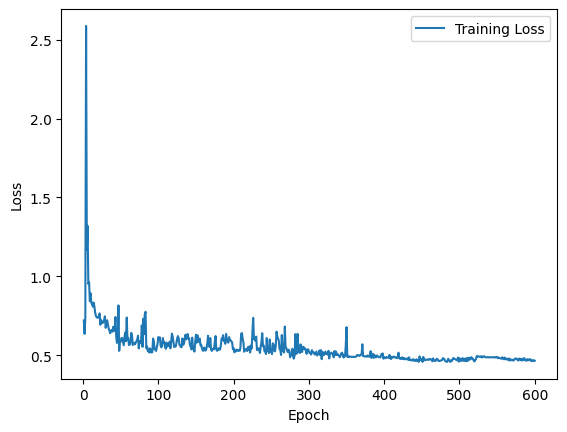

In [ ]:
loss_data=[]
epochs = 600
for e in range(epochs):
    running_loss = 0#get images
    for info, labels in train_loader:
        #Flatten images
        #images=images.view(images.shape[0], -1)
        dummy_labels=labels.float()
        #info=info.reshape(info.shape[0],)
        dummy_labels=dummy_labels.view(-1,1)
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()

        #Forward pass
        output=model(info)


        #Calculate the loss
        loss=criterion(output,dummy_labels)

        #backward propagation
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        #print(f"Epoch [{e+1}/{epochs}], Loss: {running_loss/len(train_loader)}")


     ## TODO: Implement the validation pass and print out the validation accuracy
    else:
        loss_data.append(loss)


epoch_count = range(1, epochs + 1)

loss_values = [loss.item() for loss in loss_data]

plt.plot(epoch_count, loss_values)
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
print(model)

my_model(
  (linearlinear): Sequential(
    (0): Linear(in_features=27, out_features=9, bias=True)
    (1): ReLU()
    (2): Linear(in_features=9, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
#Setting up test data
class set_up_test_data(data.Dataset):
    def __init__(self,data):
        data_matrix=data.values.astype(np.float64)
        data_matrix=torch.from_numpy(data_matrix)
        self.data=data_matrix[:,1:28].float()
        #self.data= self.data.type(torch.FloatTensor)
        #self.target=data_matrix[:,0]
        #self.target=self.target.long()
        #self.target = self.target.type(torch.FloatTensor)
        #print('target type', self.data.shape)
        self.passid=data_matrix[:,0]

        #self.target = pd_data['Survived']  # 3nd column --> label
        self.n_samples = self.data.shape[0]

    def __len__(self):   # Length of the dataset.
        return self.n_samples

    def __getitem__(self, index):   # Function that returns one point and one label.
        #return torch.Tensor(self.data[index]), torch.Tensor(self.target[index])
        return self.data[index],self.passid[index]

In [ ]:
test_set=set_up_test_data(test_data)
test_loader = data.DataLoader(test_set,batch_size=200,num_workers=0)

In [ ]:
predictions = np.array([[]])
with torch.no_grad():
    for info,passid in test_loader:
        output=model(info)
        for i in range(len(info)):
            #np.append(predictions, b[i])
            passid1=passid[i].numpy().astype(int)
            if output[i]>0.5:
                predictions=np.append(predictions,'1')
            else:
                predictions=np.append(predictions,'0')
'''
result = pd.DataFrame(columns=["PassengerId", "Survived"])
result["PassengerId"] = df_test['PassengerId']
result["Survived"] = predictions
result.to_csv("Submission-tf1.csv", index=False)
result
'''
passage=list(test_data['PassengerId'])
predict=predictions

In [ ]:
import csv

# Specify the file path for the CSV
csv_file_path = 'sample_submission.csv'

# Open the CSV file in write mode
with open(csv_file_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write header
    writer.writerow(['PassengerId', 'Transported'])

    # Write data from the lists
    for value1, value2 in zip(passage, predict):
        writer.writerow([value1, value2])

print(f"CSV file '{csv_file_path}' has been created.")


CSV file 'merged_data.csv' has been created.
